# Comparing generated image quality for the three generator models

In [1]:
import torch
import os
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchvision.utils import make_grid, save_image
from Networks import DCGenerator,DCStyleGenerator,SythesisNetwork

%matplotlib inline

In [2]:
def un_normalize(img):
    img = img*0.5 +0.5
    return img


In [3]:
model_dir = "/home/mirksonius/Desktop/Duboko Učenje 2/miniSTLYE/models/"

In [4]:
models = os.listdir(model_dir)
for m in models:
    print(m)

DC_style_disc.pth
DCgenerator.pth
DC_Style_gen.pth
DCDiscriminator.pth
DCStyleGenerator_128.pth
StyleSynthesisNetwork.pth


In [5]:
pureDC = DCGenerator(latent_size=256)
hybrid = DCStyleGenerator(latent_size=128)
pureStyle = SythesisNetwork(latent_dim = 128)

/home/mirksonius/Desktop/Duboko Učenje 2/miniSTLYE/NetBlocks.py:58: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(self.base, mode='fan_out', nonlinearity='relu')


In [6]:
pureDC.load_state_dict(
    torch.load(model_dir +"DCgenerator.pth")
)

hybrid.load_state_dict(
    torch.load(model_dir + "DCStyleGenerator_128.pth")
)
pureStyle.load_state_dict(
    torch.load(model_dir + "StyleSynthesisNetwork.pth")
)


<All keys matched successfully>

In [7]:
def get_images(model,z,nrow =5):
    imgs = un_normalize(model(z))
    imgs = make_grid(imgs,nrow = nrow).permute(1,2,0)
    return imgs.detach().numpy()


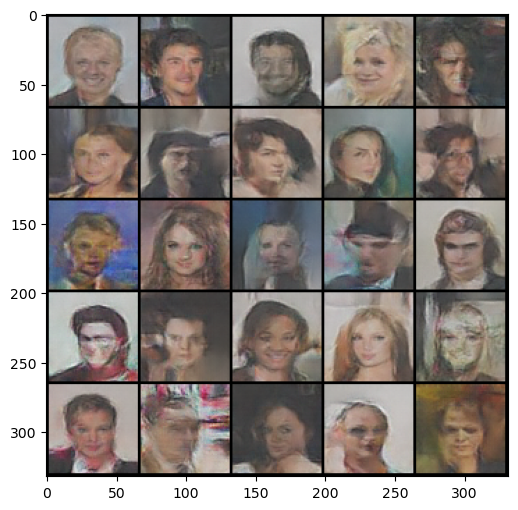

In [27]:
z = torch.randn((25,256,1,1))
DCimgs = get_images(pureDC,z,nrow= 5)
_,fig = plt.subplots(figsize =(6,6))
fig.imshow(DCimgs)
plt.savefig("pureDC.png")

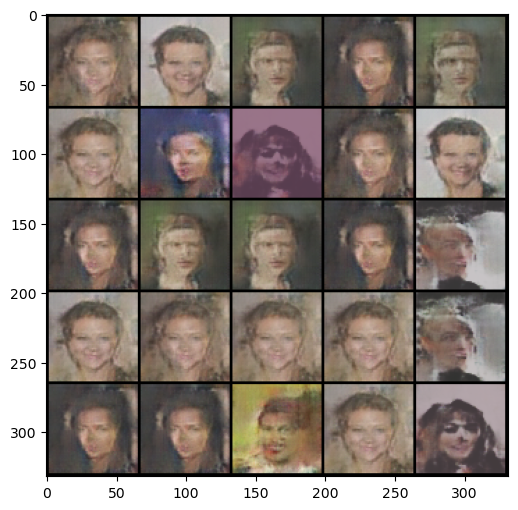

In [30]:
z = torch.randn((25,128))
hybridImgs = get_images(hybrid,z,nrow= 5)
_,fig = plt.subplots(figsize =(6,6))
fig.imshow(hybridImgs)

plt.savefig("hybrid.png")

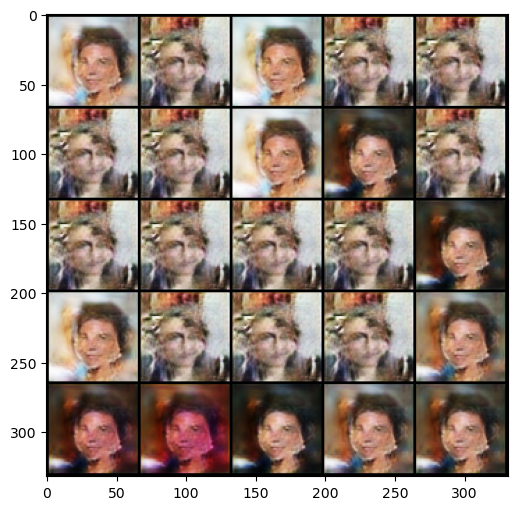

In [33]:
z = torch.randn((25,128))
styleImgs = get_images(pureStyle,z,nrow= 5)
_,fig = plt.subplots(figsize =(6,6))
fig.imshow(styleImgs)
plt.savefig("style.png")

In [11]:
DCfolder = "./DCImages/"
hybridFolder = "./HybridImages/"
styleFolder = "./StyleImages/"

In [12]:
#Ngenerated = 1000

#z = torch.randn((Ngenerated,256,1,1))
#imgs = pureDC(z)#.permute(0,2,3,1).detach().numpy()
#for i in tqdm(range(Ngenerated)):
#    save_image(imgs[i],DCfolder+"img_{}.jpg".format(i+1))

100%|██████████| 1000/1000 [00:00<00:00, 1278.38it/s]


In [13]:

#z = torch.randn((Ngenerated,128))
#imgs = hybrid(z)#.permute(0,2,3,1).detach().numpy()
#for i in tqdm(range(Ngenerated)):
#    save_image(imgs[i],hybridFolder+"img_{}.jpg".format(i+1))

100%|██████████| 1000/1000 [00:01<00:00, 880.48it/s]


In [21]:
#i = 0
#for _ in tqdm(range(100)):
#    z = torch.randn((10,128))
#    imgs = pureStyle(z) #.permute(0,2,3,1).detach().numpy()
#    for j in range(10):
#        save_image(imgs[j],styleFolder+"img_{}.jpg".format(i+1))
#        i+=1

100%|██████████| 100/100 [00:36<00:00,  2.76it/s]


In [19]:
#from data_handler import CelebaDataset
#realFolder = "./Real/"

#dataset = CelebaDataset()
#for i in tqdm(range(1000)):
#   save_image(dataset[i],realFolder+"img_{}.jpg".format(i+1))

100%|██████████| 1000/1000 [00:01<00:00, 582.81it/s]
